# PyTorch Tutorial

PyTorch is designed to seemlessly support calculations on accelerators (GPUs) while retaining the feel of numpy. The **``tensor class``** replaces numpy array and is used to hold data/arrays. PyTorch ``tensor`` also supports automatic differentiation (last lecture). 

The code you wrote for hw 3,4,5 was designed to mimic PyTorch, so a lot of this should feel familiar. Automatic differentiation is new

**Tensor Features**
* Supports many ``numpy`` operations
* Exist in ``CPU`` or ``GPU`` memory. Methods exists for transfering tensors between the ``CPU`` and the accelerator and the reverse. Below is the python code to set a ``device`` variable to ``GPU`` if one is availabe.
* Supports Autodiff. Tensors have a boolean field called ``requires_grad`` that indicates if a computational graph should be built when that tensor is used in a calculation

```python
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
```

This is a low-level look at ``PyTorch`` that ends up re-doing all of our homework models.

Over the next few weeks will get more familiar with higher-level ways of using ``PyTorch``.




# Lesson 1 - Creating Tensors

* tensors can be created directly from constants/lists
* tensors can be created from numpy arrays. 
* many operations (matplotlib) will still be done in numpy so you will also need to convert PyTorch tensors back to numpy

More details: [PyTorch Tensors](https://pytorch.org/docs/stable/tensors.html)


### Examples

```python
import numpy as np
import torch
# create from constants/lists
t0 = torch.tensor(0)
t1 = torch.tensor(1.)
t2 = torch.tensor(list(range(5)))

# tensor from numpy array
x1 = np.array(np.arange(12)).reshape(3,4)
t3 = torch.tensor(x1)
t4 = torch.from_numpy(x1)

# numpy array from tensor
x2 = t2.numpy()

# create using pytorch function

t5 = torch.ones((2,2))
t6 = torch.ones(2,2)
t7 = torch.randn(3,4)
t8 = torch.zeros_like(t7)
```

# Exercise

* Run the example code
  * print the pytorch type of t0 and t1
  * print the shape of t3
  * run a test to see if either t3 or t4 reference the same data as x1
  * does x2 reference t2 data?
  * create a tensor of 10 uniformly distributed numbers between [-1,+1]

In [1]:
  import numpy as np
  import torch
  # create from constants/lists
  t0 = torch.tensor(0)
  t1 = torch.tensor(1.)
  t2 = torch.tensor(list(range(5)))
 
  # tensor from numpy array
  x1 = np.array(np.arange(12)).reshape(3,4)
  t3 = torch.tensor(x1)
  t4 = torch.from_numpy(x1)
 
  # numpy array from tensor
  x2 = t2.numpy()
 
  # create using pytorch function
 
  t5 = torch.ones((2,2))
  t6 = torch.ones(2,2)
  t7 = torch.randn(3,4)
  t8 = torch.zeros_like(t7)

  print(t0.type())
  print(t1.type())
  print(t3.shape)

  print(t3)
  print(t4)
  x1[0,0]=-1
  print(t3[0,0]==x1[0,0])
  print(t4[0,0]==x1[0,0])

  x2[0]=-1
  print(x2)
  print(t2)

  # create 10 uniform[-1,+1] samples
  2.*(torch.rand(10)-.5)


torch.LongTensor
torch.FloatTensor
torch.Size([3, 4])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor(False)
tensor(True)
[-1  1  2  3  4]
tensor([-1,  1,  2,  3,  4])


tensor([-0.1679, -0.2027,  0.8303,  0.3699,  0.9771, -0.1190, -0.1930,  0.5954,
         0.3487, -0.7579])

In [2]:
# another example using an in-place operation (add_)

a = torch.ones(5)
print(a)
b = a.numpy()
print(b)
a.add_(1)
print(a)
print(b)    # see how the numpy array changed in value

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


# Lesson 2 - Tensor Attributes

Tensors can 'live' on the ``CPU`` or the ``GPU``. Their use can optionally create a computational graph. If a graph is constructed, then gradients will be computed for ``leaf`` nodes when ``backward`` is called. (Gradients will be covered later). Moving to/from ``GPU`` impacts graphs construction. Graph construction is controlled by the ``requires_grad`` attribute of tensor

For more tensor attributes see [Tensor Attributes](https://pytorch.org/docs/stable/tensor_attributes.html#tensor-attributes-doc)

* set your colab runtime to ```GPU```

### Examples
```python
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

def display_tensor(t):
  print("type:",t.type(),", ndim",t.ndim,", shape:",t.shape,", grad:",t.requires_grad, ", leaf:",t.is_leaf, ", cuda:",t.is_cuda,", device:",t.device)

# method 1: create tensor on desired device
t1 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
display_tensor(t1)

# method 2: create tensor on cpu and move to device
t2 = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
display_tensor(t2)
```

### Exercise

* Run example code and check tensor features
  * do the settings for ``t2`` look correct? It is important to understand leaf variables in pytorch. Leaf variables start a calculation. If an operation is performed on a variable, such as ``to(device)``, the subsequent tensor is no longer a leaf. You will see that this is important when computing gradients.

In [4]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

def display_tensor(t):
  print("type:",t.type(),", ndim",t.ndim,", shape:",t.shape,", grad:",t.requires_grad, ", leaf:",t.is_leaf, ", cuda:",t.is_cuda,", device:",t.device)

# method 1: create tensor on desired device
t1 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
display_tensor(t1)
print(t1)

# method 2: create tensor on cpu and move to device
t2 = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
display_tensor(t2)
print(t2)

# method 3: create tensor on cpu and move to device
t3 = torch.randn(1, dtype=torch.float).to(device)
t3.requires_grad_()
display_tensor(t3)
print(t3)

cuda
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: True , cuda: True , device: cuda:0
tensor([0.9578], device='cuda:0', requires_grad=True)
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: False , cuda: True , device: cuda:0
tensor([-0.4763], device='cuda:0', grad_fn=<CopyBackwards>)
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: True , cuda: True , device: cuda:0
tensor([-0.2982], device='cuda:0', requires_grad=True)


### Exercise

The following code has several intentional mistakes. Look at the output of the second ``display_tensor(foo)`` call. Is ``foo`` a cuda tensor?

The error says that ``foo`` is not a leaf variable. Leaf variables are the starting point of calculations. Why isn't ``foo`` a leaf?


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
foo = torch.tensor(1.)
display_tensor(foo)

# first mistake -- to(device) makes a copy!
foo.requires_grad=True
foo.to(device)
display_tensor(foo)

# this will fix first mistake
foo = foo.to(device)
display_tensor(foo)

# here's another try - it will fail. can you fix the problem?
foo.requires_grad=True
display_tensor(foo)



cuda
type: torch.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: False , leaf: True , cuda: False , device: cpu
type: torch.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: True , cuda: False , device: cpu
type: torch.cuda.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: False , cuda: True , device: cuda:0


RuntimeError: ignored

This will work -- now ``foo`` is a leaf

In [6]:
foo = torch.tensor(1.).to(device)
#foo.requires_grad_()   # this will also work
foo.requires_grad=True
display_tensor(foo)
print(foo)

type: torch.cuda.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: True , cuda: True , device: cuda:0
tensor(1., device='cuda:0', requires_grad=True)


In [8]:
test = torch.zeros((10,10)).to(device).detach().requires_grad_(True)
print(test.is_leaf) # True
test = torch.tensor(np.zeros((10,10)), requires_grad=True, dtype=torch.float, device=device)
display_tensor(test)

True
type: torch.cuda.FloatTensor , ndim 2 , shape: torch.Size([10, 10]) , grad: True , leaf: True , cuda: True , device: cuda:0


Converting Numpy to Tensor

In [9]:
def to_torch(x,requires_grad=False,dtype=None):
  if dtype is None:
    return torch.tensor(x,requires_grad=requires_grad,device=device)
  return torch.tensor(x,requires_grad=requires_grad,dtype=dtype,device=device)

t = to_torch(1.)
display_tensor(t)
t.requires_grad=True
display_tensor(t)

# Note: could use torch.randn instead
t = to_torch(np.random.randn(5),True)
display_tensor(t)
# this will lose 'leaf' property
t = t.type(torch.float)
display_tensor(t)
t = to_torch(np.random.randn(5),True,torch.float)
display_tensor(t)

type: torch.cuda.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: False , leaf: True , cuda: True , device: cuda:0
type: torch.cuda.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: True , cuda: True , device: cuda:0
type: torch.cuda.DoubleTensor , ndim 1 , shape: torch.Size([5]) , grad: True , leaf: True , cuda: True , device: cuda:0
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([5]) , grad: True , leaf: False , cuda: True , device: cuda:0
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([5]) , grad: True , leaf: True , cuda: True , device: cuda:0


Converting Tensor to Numpy

* tensors have a numpy method
* numpy objects can only exist in ``CPU``

Following code again has several mistakes to show what can go wrong

In [10]:
x = to_torch(np.pi,True)
y = x*x
z = y.numpy()

TypeError: ignored

In [11]:
x = to_torch(np.pi,True)
y = x*x
z = y.cpu().numpy()

RuntimeError: ignored

In [12]:
def to_numpy(x):
    return x.detach().cpu().numpy()

z = to_numpy(y)
print(z)

9.869605


# Lesson 3 - Using Tensors

* Many operations mixing constants and tensors are supported
* Operations mixing ```numpy``` arrays and tensors are not supported
* Many of the numpy functions have a counterpart in torch
* ```PyTorch``` functions that end with an underscore perform 'in-place' operations

```python
x=torch.tensor(1.)
print(torch.exp(x))
x.exp_()
print(x)
```

In [13]:
x=torch.tensor(1.)
print(torch.exp(x))
x.exp_()
print(x)

tensor(2.7183)
tensor(2.7183)


## Exercise

Write a function to compute the sigmoid function
* find the built-in ``PyTorch`` sigmoid function and check your answers using a random matrix

$$f(x)=\frac{1}{1+e^{-x}}$$

In [14]:
def pt_sigmoid(x):
  return 1./(1.+torch.exp(-x))

x=torch.randn(3,2)
print(pt_sigmoid(x))

# check using build-in sigmoid function
torch.max(pt_sigmoid(x)-torch.sigmoid(x))

tensor([[0.2544, 0.4497],
        [0.5806, 0.2443],
        [0.5166, 0.2628]])


tensor(0.)

## Exercise

Find the ``PyTorch`` softmax and eye functions
* Compute the softmax of a matrix and check that rows sum to one
* Generate a tensor of random integers and compute the corresponding one-hot matrix

In [15]:
y=torch.softmax(x,1)
print(torch.sum(y,1))

t=torch.randint(0,3,(10,))
print(t)
torch.eye(3)[t]

tensor([1., 1., 1.])
tensor([0, 0, 2, 0, 1, 0, 1, 2, 1, 2])


tensor([[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.]])

# Tensor Autodiff 1



The gradients are in the ``grid`` tensor ``grad`` field



Graphs can be visualized using the ``torchviz`` package. Computational graphs start when the first tensor with ``required_grad=True`` is used

In [17]:
!pip install torchviz

     |████████████████████████████████| 51kB 9.1MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=dd7b68b4e7948084021dbc0b6b046fa1fbda5bb548fb57744baccde5428f5985
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


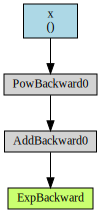

In [18]:
from torchviz import make_dot

x = torch.tensor(1.,requires_grad=True)
y = 1+x**2
z = torch.exp(y)
make_dot(z,params={'x':x,'y':y,'z':z})


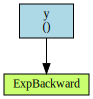

In [19]:
# same example, but x has requires_grad False, so graph starts with y

x = torch.tensor(1.)
y = 1+x**2
y.requires_grad=True
z = torch.exp(y)
make_dot(z,params={'x':x,'y':y,'z':z})

# Autodiff Example

A function $f$ is evaluated on a vector of inputs. Because the input tensor ``grid`` has ``requires_grad`` set True, a graph will be constructed when ``grid`` is used

The ``backward`` method is called with a vector of ones the same length as ``grid``. As a result $dy/dx$ is computed for each $x$ in the ``grid`` vector

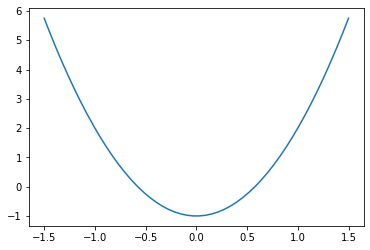

In [32]:
    import matplotlib.pyplot as plt
    def f(x):
        return x*(x*x-1)
    grid = torch.from_numpy(np.linspace(-1.5,1.5,50))
    grid.requires_grad=True
    y = f(grid)
    y.backward(torch.ones(grid.size(0),dtype=torch.float))
    plt.plot(grid.data.numpy(),grid.grad.numpy())

# Exercise

Evaluate your ``sigmoid`` function at tensor $x=0$. Use ``backward`` and print the gradient. You should get $1/4$

After calling ``backward`` the gradient is in the ``grad`` attribute of the
independent variable


In [20]:
x=torch.tensor(0.,requires_grad=True)
y=pt_sigmoid(x)
y.backward()
print(x.grad)

tensor(0.2500)


# Tensor Autdiff 2

There are times when generating a computation graph gets in the way

Here's an example


In [27]:
np.random.seed(42)
x=torch.tensor(np.random.randn(10))
y=torch.tensor(np.random.randn(10))

b = torch.tensor(1., requires_grad=True, dtype=torch.float)
w = torch.tensor(2., requires_grad=True, dtype=torch.float)

yhat = b + w * x
error = yhat - y
loss = .5*(error ** 2).mean()
loss.backward()
print(torch.mean(error))
print(b.grad)
display_tensor(b)
lr=.1

# a computation graph will be built for this calculation 
# even though we don't want to take the derivative of this
w = w - lr * w.grad
b = b - lr * b.grad
print(b,w)

yhat = b + w * x
error = yhat - y
loss = .5*(error ** 2).mean()
loss.backward()
print(torch.mean(error))
print(b.grad)       # will be None
display_tensor(b)   # shows 'b' is no longer a leaf
w = w - lr * w.grad
b = b - lr * b.grad
print(b,w)

tensor(2.6868, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(2.6868)
type: torch.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: True , cuda: False , device: cpu
tensor(0.7313, grad_fn=<SubBackward0>) tensor(1.7801, grad_fn=<SubBackward0>)
tensor(2.3196, dtype=torch.float64, grad_fn=<MeanBackward0>)
None
type: torch.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: False , cuda: False , device: cpu


TypeError: ignored

Here's an attempt to fix the problem - and again fails

PyTorch is trying to 'track' operations on the tensors b,w and
so it doesn't allow in-place operations on them

In [28]:
np.random.seed(42)
x=torch.tensor(np.random.randn(10))
y=torch.tensor(np.random.randn(10))

b = torch.tensor(1., requires_grad=True, dtype=torch.float)
w = torch.tensor(2., requires_grad=True, dtype=torch.float)

yhat = b + w * x
error = yhat - y
loss = .5*(error ** 2).mean()
loss.backward()
print(b.grad)
lr=.1

w -= lr * w.grad
b -= lr * b.grad
print(b,w)



tensor(2.6868)


RuntimeError: ignored

Here's how to do tensor calculations and tell PyTorch to
not create a graph

``with torch.no_grad():`` is a context. Contexts execute some code
before/after the following indented code. In this case it sets
and then clears a flag telling the tensor class not to construct
a graph



In [26]:
np.random.seed(42)
x=torch.tensor(np.random.randn(10))
y=torch.tensor(np.random.randn(10))

b = torch.tensor(1., requires_grad=True, dtype=torch.float)
w = torch.tensor(2., requires_grad=True, dtype=torch.float)

yhat = b + w * x
error = yhat - y
loss = .5*(error ** 2).mean()
loss.backward()
lr=.1

with torch.no_grad():
  w -= lr * w.grad
  b -= lr * b.grad

print(b,w)

tensor(0.7313, requires_grad=True) tensor(1.7801, requires_grad=True)


# Tensor Autodiff 3

$$w = z^3$$
$$z= 2y$$
$$y=x^2$$
$$x=1$$
$$w=8(x^2)^3=8x^6$$
$$\frac{\partial w}{\partial x}=48x^5$$

The following code computes $w$ twice and prints the gradient $dw/dx$ after each calculation. 

Note that the gradient is summed. (Notice that ``x`` did not get reconstructed
for the second calculation) 

We will see later how to zero gradients prior to each call of backward

In [29]:
import torch

x = torch.tensor([1.],requires_grad=True)
y = x**2
z = 2*y
z.retain_grad()
w= z**3
w.backward()
print(x.grad)
# run first time - show x.grad is 48, z.grad is 12. y.grad does not exists
# run second time without re-creating x. x grad is summed, z grad got reset so same as first time
y = x**2
z = 2*y
z.retain_grad()
w= z**3
w.backward()
print(x.grad)
print(x)

tensor([48.])
tensor([96.])
tensor([1.], requires_grad=True)


# Tensor Autodiff 4

Two more examples of using ``backward``

Recall that
$$\frac{\partial w}{\partial x}=48x^5$$

tensor([   48.,  1536., 11664.])
11664
tensor([ 48.,  96., 144.])


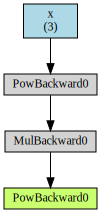

In [30]:
# zero gradients to clear previous values
def zero_grad(params):
    for p in params:
        if p.grad is not None:
            p.grad.zero_()


params = [x,y,z]
zero_grad(params)

# compute function gradient for 3 values of x
x = torch.tensor([1.,2.,3.],requires_grad=True)
y = x**2
z = 2*y
w= z**3
w.backward(torch.ones(x.size()))
print(x.grad)
print(48*3**5)

# apply different initial values for same value of x
x = torch.tensor([1.,1.,1.],requires_grad=True)
y = x**2
z = 2*y
w= z**3
w.backward(torch.tensor([1.,2.,3.]))
print(x.grad)

from torchviz import make_dot
#visualize graph
make_dot(w,params={'x':x,'y':y,'z':z})
#w.backward(torch.tensor([1.,2.,3.]))
 


# Tensor Hooks

If a ``hook`` is registered with a tensor, it is called
with the gradient value at the time the gradient is
computed. The value it returns will be used as the gradient.

Exploding gradients can be a problem with neural networks.
Clipping is used to limit the size of gradients

This example demonstrates
 * a ``hook`` that limits the size of gradient entries
 * The use of ``retain_grad`` to get gradients for non-leaf
 nodes

In [33]:
def fhook(grad):
  print("hook, input grad=",grad)
  return torch.clamp(grad,0.,100.)
    
    
# show clipping using tensor hook
# if hook returns a value it replaces computed grad

x = torch.tensor([1.,2.],requires_grad=True)
x.register_hook(fhook)
y = x**2
z = 2*y
w= z**3
w.backward(torch.tensor([1.,1.]))

print("x.grad=",x.grad)
print("y.grad=",y.grad)

# what if you want the gradient of non-leaf nodes: use retain_grad()

x.grad.zero_()   # instead of reconstructing 'x', do in-place zeroing of grad
y = x**2
z = 2*y
w= z**3
y.retain_grad()
w.backward(torch.tensor([1.,1.]))

print("x.grad=",x.grad)
print("y.grad=",y.grad)


# this hook prints gradient that isn't retained - useful for debugging
x = torch.randn(1, 1)
w = torch.randn(1, 1, requires_grad=True)
w.register_hook(lambda x: print("w.grad=",x))
y = torch.randn(1, 1)
out = x * w
loss = (out - y)**2
loss.register_hook(lambda x: print("loss.grad=",x))
loss.mean().backward(gradient=torch.tensor(0.1))  # prints the gradient in w and loss
print(x.grad)
print(w.grad)

hook, input grad= tensor([  48., 1536.])
x.grad= tensor([ 48., 100.])
y.grad= None
hook, input grad= tensor([  48., 1536.])x.grad=
 tensor([ 48., 100.])
y.grad= tensor([ 24., 384.])
loss.grad= tensor([[0.1000]])
w.grad= tensor([[-0.0342]])None

tensor([[-0.0342]])


# Regression Example

Simple linear regression, $1^d$ inputs, squared error cost function

$$\hat{y}_i=b+wx_i$$
$$C=\frac{1}{2}\sum_i (\hat{y}_i-t_i)^2$$
$$\frac{\partial C}{\partial b}=\frac{1}{m}\sum_i (\hat{y}_i-t_i)$$
$$\frac{\partial C}{\partial w}=\frac{1}{m}\sum_i (\hat{y}_i-t_i)x_i$$





# Regression

Will use linear regression as an extended example. Much of the content in the next few sections is similar to: [Understanding PyTorch with an example](https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e)

Start by running the following code to create/plot a data set

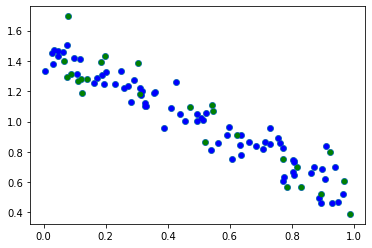

In [34]:
import matplotlib.pyplot as plt

b = 1.5
w = -1.
x=np.random.uniform(0,1.,size=(100,1))
y=b + w*x + .1*np.random.randn(100,1)

plt.scatter(x,y)

indices = list(range(y.shape[0]))
np.random.shuffle(indices)

split=75
train_set = indices[:split]
test_set = indices[split:]
x_train,y_train = x[train_set],y[train_set]
x_test,y_test = x[test_set],y[test_set]
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)

# Numpy Implementation 

Numpy doesn't have autodiff, so gradients need to be calculated

initial parameters: 0.0 [0.00496714]
b,w= 1.4741805237259302 [-0.94402276]


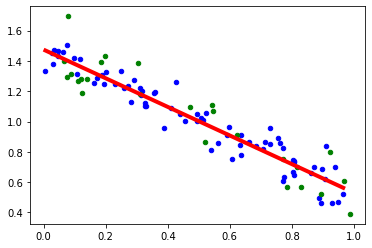

In [35]:

# Initializes parameters
np.random.seed(42)
w = np.random.randn(1)*.01
b = 0.

print("initial parameters:",b,w)


# Sets learning rate
lr = 1e-1
# Defines number of epochs
epochs = 1000

for epoch in range(epochs):
    # Computes our model's predicted output
    yhat = b + w * x_train
    # It is a regression, so it computes mean squared error (MSE)
    error = (yhat-y_train)
    loss = .5*(error**2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    b_grad = error.mean()
    w_grad = (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    b -= lr * b_grad
    w -= lr * w_grad
    
print("b,w=",b,w)

plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b+w*np.min(x_train),b+w*np.max(x_train)],c='r',linewidth=4)


# PyTorch Implementation

Notice that ``loss.backward()`` replaces calculation of gradients

``PyTorch`` tensors are similar to the ``NetParameter`` class you've used all semester. They have ``data`` and ``grad`` fields

tensor(1.4742, device='cuda:0', requires_grad=True) tensor([-0.9440], device='cuda:0', requires_grad=True)


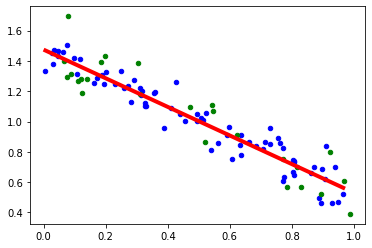

In [36]:

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device

# Large data sets can't be moved to the ``GPU``. We will see later how to deal with that

x_train_tensor = torch.tensor(x_train, dtype=torch.float, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float, device=device)

w = torch.tensor(np.random.randn(1)*.01,requires_grad=True, dtype=torch.float, device=device)
b = torch.tensor(0.,requires_grad=True, dtype=torch.float, device=device)

def lossf(yhat,y):
    error = (yhat-y)
    return .5*(error**2).mean()
def zero_grad(params):
    for p in params:
        if p.grad is not None:
            p.grad.zero_()

for epoch in range(1,epochs+1):
  yhat = b + w * x_train_tensor
  loss = lossf(yhat,y_train_tensor)
  loss.backward()
  with torch.no_grad():
      b -= lr*b.grad
      w -= lr*w.grad
  zero_grad([b,w])
b_cpu=b.detach().cpu().numpy()
w_cpu=w.detach().cpu().numpy()
print(b,w)
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b_cpu+w_cpu*np.min(x_train),b_cpu+w_cpu*np.max(x_train)],c='r',linewidth=4)

In [8]:
!pip install torchviz

     |████████████████████████████████| 51kB 4.4MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=5feaf50b37687ec3aa151559df5da67eb12c2b30268288b150ce1e05cca7da32
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


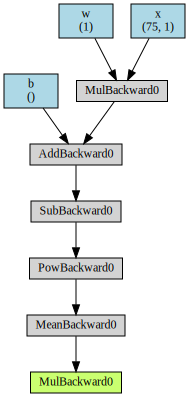

In [37]:
from torchviz import make_dot
x_train_tensor.requires_grad = True   # this is need for it to appear in graph
yhat = b + w * x_train_tensor
loss = lossf(yhat,y_train_tensor)
make_dot(loss,params={'b':b,'w':w,'x':x_train_tensor})
#x_train_tensor.requires_grad = False

# Optimizers

In previous example we hand-coded vanilla gradient descent. ``PyTorch`` has
a large number of optimizers

It's interesting that the optimizer doesn't need a reference to the model,
it just needs an iterable list of the model adjustable parameters

* PyTorch has an ``optim`` package

[PyTorch Optimizers](https://pytorch.org/docs/stable/optim.html)

* PyTorch documentation includes links to source code
[SGD Source](https://pytorch.org/docs/stable/_modules/torch/optim/sgd.html#SGD)

1.4741797 [-0.9440212]


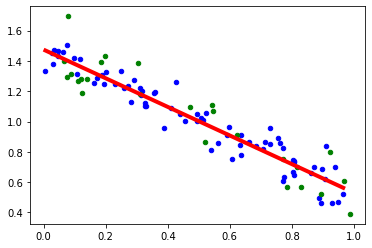

In [45]:
import torch.optim

w = torch.tensor(np.random.randn(1)*.01,requires_grad=True, dtype=torch.float, device=device)
b = torch.tensor(0.,requires_grad=True, dtype=torch.float, device=device)
params = [b,w]
opt = torch.optim.SGD(params, lr=lr)
for epoch in range(1,epochs+1):
  yhat = b + w * x_train_tensor
  loss = lossf(yhat,y_train_tensor)
  loss.backward()
  opt.step()
  opt.zero_grad()

b_cpu=b.detach().cpu().numpy()
w_cpu=w.detach().cpu().numpy()
print(b_cpu,w_cpu)
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b_cpu+w_cpu*np.min(x_train),b_cpu+w_cpu*np.max(x_train)],c='r',linewidth=4)

# Loss Functions

``PyTorch`` has the commonly used loss functions. For this regression
example will use mean squared error loss

* Loss functions are part of the very large ``nn`` package

[PyTorch Loss Functions](https://pytorch.org/docs/stable/nn.html)

* PyTorch documentation includes source code links

[BCEWithLogitsLoss Source](https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html#BCEWithLogitsLoss)

* For each loss function you need understand the inputs. For example, when using ``BCEWithLogitsLoss`` you call with output net-values. If you use ``BCELoss`` you call with sigmoid values

1.4751109 [-0.9457676]


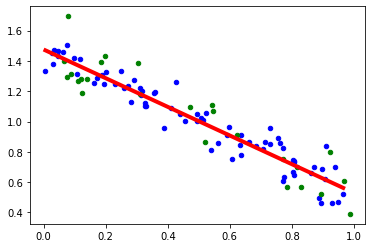

In [39]:
import torch.nn as nn
 
w = torch.tensor(np.random.randn(1)*.01,requires_grad=True, dtype=torch.float, device=device)
b = torch.tensor(0.,requires_grad=True, dtype=torch.float, device=device)
params = [b,w]
mse_loss_fn = nn.MSELoss()   # reduction='mean' is the default
opt = torch.optim.SGD(params, lr=lr)
for epoch in range(1,epochs+1):
  yhat = b + w * x_train_tensor
  loss = mse_loss_fn(yhat,y_train_tensor)   # call with estimates and targets
  loss.backward()
  opt.step()
  opt.zero_grad()

b_cpu=b.detach().cpu().numpy()
w_cpu=w.detach().cpu().numpy()
print(b_cpu,w_cpu)
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b_cpu+w_cpu*np.min(x_train),b_cpu+w_cpu*np.max(x_train)],c='r',linewidth=4)

# PyTorch Module

Up to now we don't have a model. Now will sublcass ``Module`` and create our
first ``PyTorch`` model

models subclass ``torch.nn.Module``. Module gives models a standard interface and handle 'registration' of parameters. Some import methods:
  * ``__init__()`` - instantiates needed parameters and layers
  * ``forward()`` - this is where you implement the network forward calculation
  * ``__callable__()`` - Module overloads callable and calls your forward method
  * ``named_parameters()`` - returns a dictionary of parameters names and values
  * ``parameters()`` - returns a list of all parameters
  * Note: parameters automatically have ``requires_grad=True``

* Module is part of the ``nn`` package. 

[PyTorch Module Documentation](https://pytorch.org/docs/stable/nn.html)

* Source code link

[Module Source Code](https://pytorch.org/docs/stable/_modules/torch/nn/modules/module.html#Module)

In [0]:
# now encapsulate as a 'model'

# adjustable parameters are 'registered' and estimates are computed using
# forward. We will continue assuming that models produce 'net-values'

# note that there is no ``backward`` method because gradients are computed using
# auto-diff

class LinearFit(nn.Module):
    def __init__(self):
        super(LinearFit,self).__init__()
        self.w = nn.Parameter(torch.tensor(np.random.randn(1)*.01, dtype=torch.float))
        self.b = nn.Parameter(torch.tensor(0., dtype=torch.float))
        display_tensor(self.b)
        display_tensor(self.w)
    def forward(self,inputs):
        return self.b+self.w*inputs
    


type: torch.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: True , cuda: False , device: cpu
type: torch.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: True , cuda: False , device: cpu
OrderedDict([('w', tensor([0.0158], device='cuda:0')), ('b', tensor(0., device='cuda:0'))])
the model has  2  parameters
Parameter containing:
tensor([0.0158], device='cuda:0', requires_grad=True)
Parameter containing:
tensor(0., device='cuda:0', requires_grad=True)
<generator object Module.named_parameters at 0x7ff010b2c200>
1.4620502 [-0.9212772]


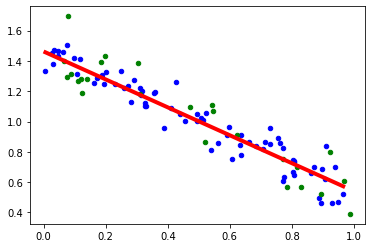

In [43]:
# note that the model is 'moved' to the ``GPU`` just like the data
# under the hood each of the parameters has ``to(device)`` applied
model = LinearFit().to(device)
print(model.state_dict())
print('the model has ',len(list(model.parameters())),' parameters')
for p in model.parameters(): print(p)
print(model.named_parameters())


lr = .15
epochs = 200
mse_loss_fn = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=lr)  # made mistake first time -- used params -- no training happened
for epoch in range(1,epochs+1):
    model.train()   # set model to 'train' model (Not 'eval')
    yhat = model(x_train_tensor)
    loss = mse_loss_fn(yhat,y_train_tensor)
    loss.backward()
    opt.step()
    opt.zero_grad()
b_cpu=model.b.detach().cpu().numpy()
w_cpu=model.w.detach().cpu().numpy()
print(b_cpu,w_cpu)
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b_cpu+w_cpu*np.min(x_train),b_cpu+w_cpu*np.max(x_train)],c='r',linewidth=4)

# Training Step Function

It should be clear by now that there are LOTS of moving parts.

To help manage the details will try to abstract some processes in functions

In [0]:
# now abstract training step
def make_train_step(model,loss_fn,optimizer):
    def train_step(inputs,targets):
        model.train()   # set model to 'train' model (Not 'eval')
        yhat = model(inputs)
        loss = loss_fn(yhat,targets)
        loss.backward()
        optimizer.step()
        #print(epoch,y.detach().numpy())
        optimizer.zero_grad()
        return loss.item()  # this returns a cpu scalar
    return train_step



type: torch.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: True , cuda: False , device: cpu
type: torch.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: True , cuda: False , device: cpu


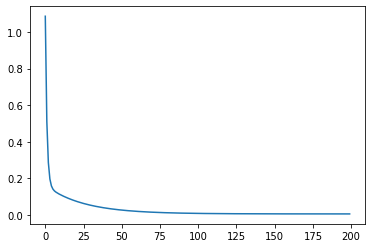

1.4621277 [-0.92142254]


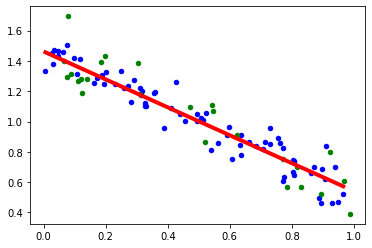

In [48]:
lr = .15
epochs = 200
model = LinearFit().to(device)
mse_loss_fn = nn.MSELoss(reduction='mean')
opt = torch.optim.SGD(model.parameters(), lr=lr) 
train_step = make_train_step(model,mse_loss_fn, opt)

losses = []
for epoch in range(1,epochs+1):
    loss = train_step(x_train_tensor, y_train_tensor)   # train_step makes sure model is in 'train' mode
    losses.append(loss)

plt.plot(losses)
plt.show()
b_cpu=model.b.detach().cpu().numpy()
w_cpu=model.w.detach().cpu().numpy()
print(b_cpu,w_cpu)
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b_cpu+w_cpu*np.min(x_train),b_cpu+w_cpu*np.max(x_train)],c='r',linewidth=4)

# Datasets - Creating mini-batches

``PyTorch`` uses ``Dataset`` and ``Dataloader`` to standardize feeding data to networks

``GPUs`` have much less memory than ``CPUs``. Standard practice is to keep the full data set in files or in ``CPU`` memory and only move batches to ``GPU``

* ``Dataset`` implementation must support indexing by overloading the ``__getitem__`` magic method. Indexing returns a tuple (x,y)

* For simple array data, the ``PyTorch`` convenience class ``TensorDataset`` can be used

* Once you have a ``Dataset`` you can use the ``PyTorch`` ``Dataloader`` class to shuffle and load batches

In [49]:
from torch.utils.data import Dataset, TensorDataset

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

# Wait, is this a CPU tensor now? Why? Where is .to(device)?
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

(tensor([0.9489]), tensor([0.4709]))
(tensor([0.9489]), tensor([0.4709]))


In [52]:
from torch.utils.data import DataLoader

print(x_train_tensor.shape)
train_loader = DataLoader(dataset=train_data, batch_size=15, shuffle=True)

for batch,(x_batch,y_batch) in enumerate(train_loader):
  print(batch)

for batch,(x_batch,y_batch) in enumerate(train_loader):
  print(batch)

torch.Size([75, 1])
0
1
2
3
4
0
1
2
3
4


In [55]:
# For validation, can either create a second dataset or
# create one dataset for all of the data and let PyTorch do the split

print(x.shape)
print(y.shape)
from torch.utils.data.dataset import random_split

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)

train_frac=.75
lengths = [int(len(x)*train_frac), int(len(x)*(1.-train_frac))]
print(lengths)
# the 75 and 25 are actual counts -- not percentages -- should use code similar to 'lengths' above
train_dataset, val_dataset = random_split(dataset, [75, 25])

train_loader = DataLoader(dataset=train_dataset, batch_size=15)
val_loader = DataLoader(dataset=val_dataset, batch_size=25)

(100, 1)
(100, 1)
[75, 25]


type: torch.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: True , cuda: False , device: cpu
type: torch.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: True , cuda: False , device: cpu
200
OrderedDict([('w', tensor([-0.9559], device='cuda:0')), ('b', tensor(1.4800, device='cuda:0'))])


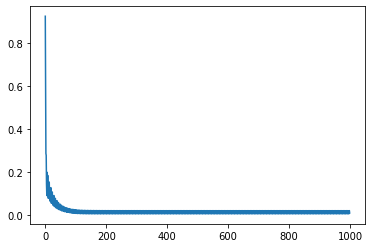

1.4800122 [-0.95594156]


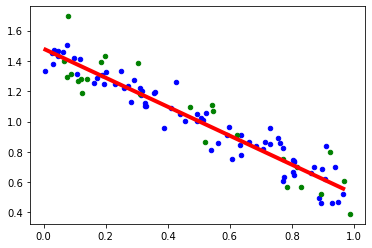

In [57]:

# this is a big step - now train our model using batches
# and only move data to ``GPU`` in batches

losses = []
model = LinearFit().to(device)
opt = torch.optim.SGD(model.parameters(), lr=lr)
train_step = make_train_step(model, mse_loss_fn, opt)
print(epochs)
for epoch in range(epochs):
    for x_batch, y_batch in train_loader:
        # the dataset "lives" in the CPU, so do our mini-batches
        # therefore, we need to send those mini-batches to the
        # device where the model "lives"
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
print(model.state_dict())
plt.plot(losses)
plt.show()

b_cpu=model.b.detach().cpu().numpy()
w_cpu=model.w.detach().cpu().numpy()
print(b_cpu,w_cpu)
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b_cpu+w_cpu*np.min(x_train),b_cpu+w_cpu*np.max(x_train)],c='r',linewidth=4)

# Evaluation

Models are trained on the training data and evaluated on the test/validation
data. 

There are two keys to evaluation

* use ``eval()`` method to put model in eval mode. Some layers, like batch normalization behave differently when training vs. evaluation

* turn off computation graph creation by enclosing doe within the ``no_grad()`` context

type: torch.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: True , cuda: False , device: cpu
type: torch.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: True , cuda: False , device: cpu
OrderedDict([('w', tensor([-0.9559], device='cuda:0')), ('b', tensor(1.4800, device='cuda:0'))])


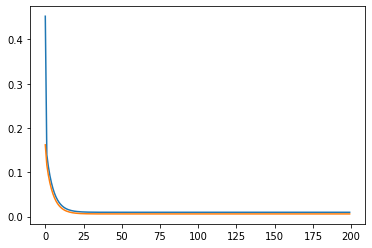

1.4800122 [-0.95594156]


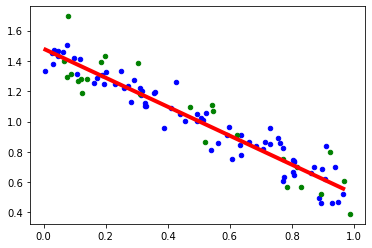

In [58]:
losses = []
val_losses = []
model = LinearFit().to(device)
opt = torch.optim.SGD(model.parameters(), lr=lr)
train_step = make_train_step(model, mse_loss_fn, opt)

# Code now has a 'training' loop and an 'eval' loop
for epoch in range(epochs):
  total_loss = 0.
  for batch, (x_batch, y_batch) in enumerate(train_loader):
      inputs = x_batch.to(device)
      targets = y_batch.to(device)

      loss = train_step(inputs, targets)
      total_loss += loss
  losses.append(total_loss/(batch+1.))
  
  # assuming that validation data is small enough to treat as a single batch 
  # if that's not the case then will need to average losses as like above
  with torch.no_grad():
      for x_val, y_val in val_loader:
          inputs = x_val.to(device)
          targets = y_val.to(device)
          
          model.eval()

          yhat = model(inputs)
          val_loss = mse_loss_fn(yhat,targets)
          val_losses.append(val_loss.item())

print(model.state_dict())
plt.plot(losses)
plt.plot(val_losses)
plt.show()

b_cpu=model.b.detach().cpu().numpy()
w_cpu=model.w.detach().cpu().numpy()
print(b_cpu,w_cpu)
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b_cpu+w_cpu*np.min(x_train),b_cpu+w_cpu*np.max(x_train)],c='r',linewidth=4)

# Learning-Rate Schedule

Will keep rate schedule outside of 'step' function - usually updated once/epoch, not once/batch. Some schedulers do update once/batch

* PyTorch schedulers are part of the ``optim`` package

[PyTorch Schedulers](https://pytorch.org/docs/stable/optim.html)

* The documentation includes link to the source code which I find very useful
[StepLR Source](https://pytorch.org/docs/stable/_modules/torch/optim/lr_scheduler.html#StepLR)

type: torch.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: True , cuda: False , device: cpu
type: torch.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: True , cuda: False , device: cpu
1 0.5592366933822632 [0.1]
2 0.16729788035154342 [0.1]
3 0.1303131565451622 [0.1]
4 0.113434100151062 [0.1]
5 0.09943805187940598 [0.1]
6 0.08732286617159843 [0.1]
7 0.07683618813753128 [0.1]
8 0.06776539757847785 [0.1]
9 0.05992104336619377 [0.1]
10 0.053137682378292084 [0.1]
11 0.047271904349327085 [0.1]
12 0.04219959937036037 [0.1]
13 0.03781342208385467 [0.1]
14 0.03402056321501732 [0.1]
15 0.030740764737129212 [0.1]
16 0.02790461964905262 [0.1]
17 0.025452107936143876 [0.1]
18 0.023331335559487344 [0.1]
19 0.021497424133121966 [0.1]
20 0.019911570101976396 [0.1]
21 0.018540215864777564 [0.1]
22 0.017354346439242364 [0.1]
23 0.01632887776941061 [0.1]
24 0.015442103520035744 [0.1]
25 0.014675267040729523 [0.1]
26 0.014012141339480876 [0.1]
27 0.013438702374696732 

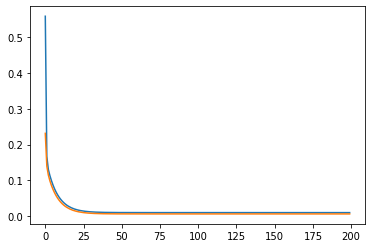

1.4788703 [-0.95615226]


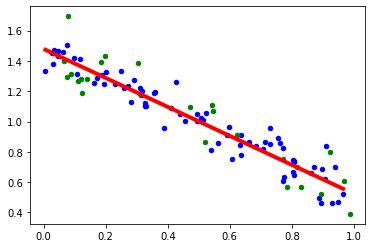

In [60]:
from  torch.optim.lr_scheduler import MultiStepLR

losses = []
val_losses = []
model = LinearFit().to(device)
opt = torch.optim.SGD(model.parameters(), lr=.1)   # sets the initial LR
train_step = make_train_step(model, mse_loss_fn, opt)
# here's the new piece
lrsched = MultiStepLR(opt, milestones=[i*40 for i in range(1,epochs//40)], gamma=0.9)

for epoch in range(1,epochs+1):
  total_loss = 0.
  for batch, (x_batch, y_batch) in enumerate(train_loader):
      inputs = x_batch.to(device)
      targets = y_batch.to(device)

      loss = train_step(inputs, targets)
      total_loss += loss
  losses.append(total_loss/(batch+1.))
  print(epoch,losses[-1],lrsched.get_last_lr())
  lrsched.step()  # don't forget to 'step' the learning rate
  
  # assuming that validation data is small enough to treat as a single batch 
  # if that's not the case then will need to average losses as like above
  with torch.no_grad():
      for x_val, y_val in val_loader:
          inputs = x_val.to(device)
          targets = y_val.to(device)
          
          model.eval()

          yhat = model(inputs)
          val_loss = mse_loss_fn(yhat,targets)
          val_losses.append(val_loss.item())

print(model.state_dict())
plt.plot(losses)
plt.plot(val_losses)
plt.show()

b_cpu=model.b.detach().cpu().numpy()
w_cpu=model.w.detach().cpu().numpy()
print(b_cpu,w_cpu)
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b_cpu+w_cpu*np.min(x_train),b_cpu+w_cpu*np.max(x_train)],c='r',linewidth=4)

# Training Functions

Here's another attempt to manage the details - creating separte evaluation and
training functions

It's annoying, but because different learning rate schedules have different interfaces I created two trainig functions.

In [0]:
from  torch.optim.lr_scheduler import ReduceLROnPlateau

# make train loop kind of re-usable
# different rate schedulers have different interfaces -- 
# note how difficult it is to get current lr from the ReduceOnPlateau scheduler

def make_eval_model(model,val_loader,loss_fn):
  def closure():
    #val_losses = []
    # assuming that validation data is small enough to treat as a single batch 
    # if that's not the case then will need to average losses as like above
    # there should be a check that val_loader only provides 1 batch
    with torch.no_grad():
        for i, (x_val, y_val) in enumerate(val_loader):
          assert i==0, 'eval_model: more than 1 batch, code will fail'
          inputs = x_val.to(device)
          targets = y_val.to(device)
          model.eval()
          yhat = model(inputs)
          val_loss = loss_fn(yhat,targets)
          #val_losses.append(val_loss.item())
    return val_loss.item()
  return closure

# train generic -- assumes scheduler.step called once/epoch and has a get_last_lr() method
def train_model_generic(model,train_step,eval_model,epochs,lrsched,train_loader):
  losses = []
  val_losses = []
  for epoch in range(1,epochs+1):
    total_loss = 0.
    for batch, (x_batch, y_batch) in enumerate(train_loader):
        inputs = x_batch.to(device)
        targets = y_batch.to(device)

        loss = train_step(inputs, targets)
        total_loss += loss
    losses.append(total_loss/(batch+1.))
    print(epoch,losses[-1],lrsched.get_last_lr())
    lrsched.step()
    
    val_loss = eval_model()  # enforcing 1 batch for validation -- so just a single number
    val_losses.append(val_loss)
  return {'train_loss':losses, 'test_loss':val_losses}

# train using ReduceOnPlateau scheduler
def train_model_plateau(model,train_step,eval_model,epochs,lrsched,train_loader):
  losses = []
  val_losses = []
  for epoch in range(1,epochs+1):
    total_loss = 0.
    for batch, (x_batch, y_batch) in enumerate(train_loader):
        inputs = x_batch.to(device)
        targets = y_batch.to(device)

        loss = train_step(inputs, targets)
        total_loss += loss
    losses.append(total_loss/(batch+1.))
    print(epoch,losses[-1],lrsched.optimizer.param_groups[0]['lr'])
    lrsched.step(loss)
    
    val_loss = eval_model()  # enforcing 1 batch for validation -- so just a single number
    val_losses.append(val_loss)
  return {'train_loss':losses, 'test_loss':val_losses}



type: torch.FloatTensor , ndim 0 , shape: torch.Size([]) , grad: True , leaf: True , cuda: False , device: cpu
type: torch.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: True , cuda: False , device: cpu
1 0.5574194252490997 0.1
2 0.16826716661453248 0.1
3 0.13128475099802017 0.1
4 0.11428101509809493 0.1
5 0.10017068237066269 0.1
6 0.0879563957452774 0.1
7 0.07738399878144264 0.1
8 0.06823910251259804 0.1
9 0.060330658406019214 0.1
10 0.05349188819527626 0.1
11 0.047578196972608566 0.1
12 0.04246445447206497 0.1
13 0.03804244920611381 0.1
14 0.0342186089605093 0.1
15 0.030912017077207567 0.1
16 0.02805269882082939 0.1
17 0.02558015435934067 0.1
18 0.023442061990499495 0.1
19 0.021593176014721393 0.1
20 0.01999437380582094 0.1
21 0.018611820228397847 0.1
22 0.017416265048086643 0.1
23 0.0163824200630188 0.1
24 0.015488405711948872 0.1
25 0.014715306088328361 0.1
26 0.014046767167747021 0.1
27 0.013468644954264164 0.1
28 0.01296871192753315 0.1
29 0.01253638816997409 

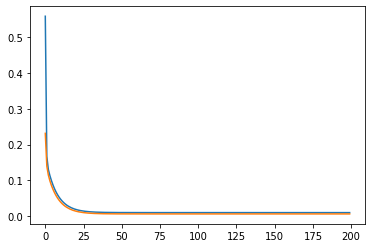

1.4668565 [-0.93542063]


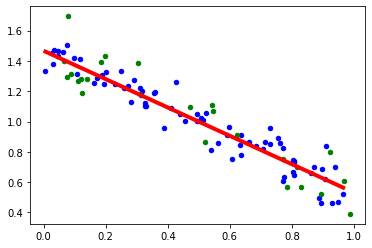

In [64]:
model = LinearFit().to(device)
opt = torch.optim.SGD(model.parameters(), lr=.1)   # sets the initial LR
train_step = make_train_step(model, mse_loss_fn, opt)
eval_model = make_eval_model(model,val_loader,mse_loss_fn)
#lrsched = MultiStepLR(opt, milestones=[i*40 for i in range(1,epochs//40)], gamma=0.9)
lrsched = ReduceLROnPlateau(opt, 'min')
train_metrics = train_model_plateau(model,train_step,eval_model,epochs,lrsched,train_loader)
print(model.state_dict())
plt.plot(losses)
plt.plot(val_losses)
plt.show()

b_cpu=model.b.detach().cpu().numpy()
w_cpu=model.w.detach().cpu().numpy()
print(b_cpu,w_cpu)
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b_cpu+w_cpu*np.min(x_train),b_cpu+w_cpu*np.max(x_train)],c='r',linewidth=4)

# Neural Network Model

Finally - switch from linear model to Neural Network model

We will keep all of the machinery

These methods should be familiar to you

In [0]:
# No-hidden layer net using low-level 

class FCNet0(nn.Module):
  def __init__(self,inp_d,out_d=1,outf=None):
    super(FCNet0,self).__init__()
    self.outf = outf
    self.b = nn.Parameter(torch.zeros(out_d))
    self.w = nn.Parameter(torch.randn(inp_d,out_d)*.01)

  def forward(self,inputs):
    return self.b + inputs @ self.w
  
  # call with z=forward(x)
  def fit(self,z):
    return z if self.outf is None else self.outf(z)

  # call with z=forward(x)
  def predict(self,z):
    yhat=self.fit(z)
    if yhat.shape[1]==1 or z.ndim==1:
        return (yhat>=0.5).int()
    else:
        return torch.argmax(yhat,axis=1)
        
  # note: call with integer targets (NOT one-hot) for soft max
  # call with z=forward(x)
  def accuracy(self,z,targets):
      pred=self.predict(z)
      return (pred == targets.int()).float().mean() 


# Fully Connect Network with arbitrary number of hidden layers
# hid_d should be a tuple. For no hidden hid_d=(), for 1 hidden hid_d=(h1,), for 2 hidden hid_d=(h1,h2) ...
class FCNet(nn.Module):
  def __init__(self, inp_d, hid_d, out_d=1,actf = None,outf=None):
      super(FCNet, self).__init__()
      
      self.layers=[]
      dims = (inp_d,*hid_d,out_d)
      for i,(first_d,second_d) in enumerate(zip(dims,dims[1:])):
          self.layers.append(nn.Linear(first_d, second_d))
          self.add_module('fc'+str(i+1),self.layers[-1])
      self.actf = actf
      self.outf = outf
  
  # inputs must be a tensor
  def forward(self, inputs):
      y = inputs
      for layer in self.layers:
          z = layer(y)
          y = self.actf(z)
      return z
  # call with z=forward(x)
  def fit(self,z):
    return z if self.outf is None else self.outf(z)

  # call with z=forward(x)
  def predict(self,z):
    yhat=self.fit(z)
    if yhat.shape[1]==1 or z.ndim==1:
      return (yhat>=0.5).int()
    else:
      return torch.argmax(yhat,axis=1)
        
  # note: call with integer targets (NOT one-hot) for soft max
  # call with z=forward(x)
  def accuracy(self,z,targets):
      pred=self.predict(z)
      return (pred == targets.int()).float().mean()

  def _apply(self,func):
      super(FCNet,self)._apply(func)
      #print('_apply',func)
      return self        

# No Hidden Layers

b
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: True , cuda: True , device: cuda:0
w
type: torch.cuda.FloatTensor , ndim 2 , shape: torch.Size([1, 1]) , grad: True , leaf: True , cuda: True , device: cuda:0
1 0.555219691991806 0.1
2 0.1694607436656952 0.1
3 0.13247940689325333 0.1
4 0.11532227694988251 0.1
5 0.10107143819332123 0.1
6 0.08873529061675071 0.1
7 0.07805752381682396 0.1
8 0.06882151588797569 0.1
9 0.060834290087223054 0.1
10 0.05392739772796631 0.1
11 0.047954798489809033 0.1
12 0.042790114879608154 0.1
13 0.038324054703116416 0.1
14 0.03446212001144886 0.1
15 0.031122588366270066 0.1
16 0.02823479361832142 0.1
17 0.02573762312531471 0.1
18 0.023578232154250145 0.1
19 0.021710922941565514 0.1
20 0.02009619176387787 0.1
21 0.018699860759079458 0.1
22 0.01749240271747112 0.1
23 0.01644825655966997 0.1
24 0.015545333921909332 0.1
25 0.014764534123241902 0.1
26 0.014089337922632695 0.1
27 0.01350545883178711 0.1
28 0.013000546861439944 0.1

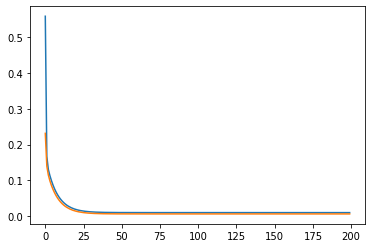

1.466799259185791 -0.9353151321411133


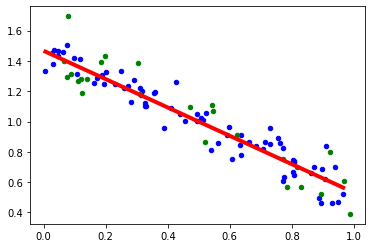

In [67]:

model = FCNet0(x_train.shape[1],y_train.shape[1]).to(device)
for p in model.named_parameters():
  print(p[0])
  display_tensor(p[1])

opt = torch.optim.SGD(model.parameters(), lr=.1)   # sets the initial LR
train_step = make_train_step(model, mse_loss_fn, opt)
eval_model = make_eval_model(model,val_loader,mse_loss_fn)
#lrsched = MultiStepLR(opt, milestones=[i*40 for i in range(1,epochs//40)], gamma=0.9)
lrsched = ReduceLROnPlateau(opt, 'min')
train_metrics = train_model_plateau(model,train_step,eval_model,epochs,lrsched,train_loader)
print(model.state_dict())
plt.plot(losses)
plt.plot(val_losses)
plt.show()

b_cpu=model.b.detach().cpu().numpy().item()
w_cpu=model.w.detach().cpu().numpy().item()
print(b_cpu,w_cpu)
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.plot([np.min(x_train),np.max(x_train)],[b_cpu+w_cpu*np.min(x_train),b_cpu+w_cpu*np.max(x_train)],c='r',linewidth=4)

# Any Number of Hidden Layers

fc1.weight
type: torch.cuda.FloatTensor , ndim 2 , shape: torch.Size([500, 1]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc1.bias
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([500]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc2.weight
type: torch.cuda.FloatTensor , ndim 2 , shape: torch.Size([500, 500]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc2.bias
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([500]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc3.weight
type: torch.cuda.FloatTensor , ndim 2 , shape: torch.Size([1, 500]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc3.bias
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([1]) , grad: True , leaf: True , cuda: True , device: cuda:0
1 6.834758794307708 0.1
2 0.3848730266094208 0.1
3 0.13287915885448456 0.1
4 0.046085114032030104 0.1
5 0.06541478633880615 0.1
6 0.030165597423911096 0.1
7 0.027798050455749033 0.1
8 0.017978544253855942 

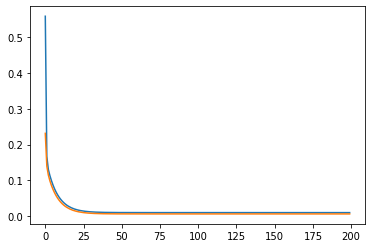

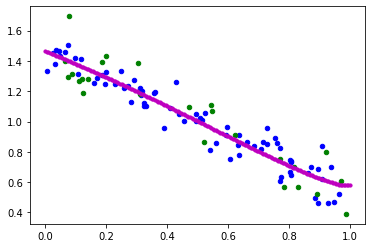

In [68]:


model = FCNet(x_train.shape[1],(500,500),y_train.shape[1],torch.relu).to(device)
for p in model.named_parameters():
  print(p[0])
  display_tensor(p[1])
opt = torch.optim.SGD(model.parameters(), lr=.1)   # sets the initial LR
train_step = make_train_step(model, mse_loss_fn, opt)
eval_model = make_eval_model(model,val_loader,mse_loss_fn)
#lrsched = MultiStepLR(opt, milestones=[i*40 for i in range(1,epochs//40)], gamma=0.9)
lrsched = ReduceLROnPlateau(opt, 'min')
train_metrics = train_model_plateau(model,train_step,eval_model,epochs,lrsched,train_loader)
#print(model.state_dict())
plt.plot(losses)
plt.plot(val_losses)
plt.show()

npgrid=np.linspace(.0,1.,201)
grid=torch.tensor(npgrid.reshape(-1,1),device=device).float()
mfit = model(grid).detach().cpu()
plt.scatter(x_train,y_train,c='b',s=20)
plt.scatter(x_test,y_test,c='g',s=20)
plt.scatter(npgrid,mfit,c='m',s=10)


# Parameter Initialization

The 'apply' method provided by the parent 'nn.Module' class is used to visit
the parameters and initialize them

First - let's make a more interesting data set

(100, 1)
(100, 1)


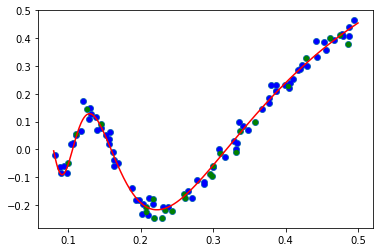

In [70]:
import matplotlib.pyplot as plt
def f(x): return x*np.sin(1./x)

np.random.seed(42)
x2 = np.random.uniform(.08,.5,size=(100,1))
y2 = f(x2)+.025*np.random.randn(100,1)

plt.scatter(x2,y2)
plt.plot(np.linspace(.08,.5,201),f(np.linspace(.08,.5,201)),c='r')

indices = list(range(y.shape[0]))
np.random.shuffle(indices)

split=75
train_set = indices[:split]
test_set = indices[split:]
x2_train,y2_train = x2[train_set],y2[train_set]
x2_test,y2_test = x2[test_set],y2[test_set]
plt.scatter(x2_train,y2_train,c='b',s=20)
plt.scatter(x2_test,y2_test,c='g',s=20)

print(x.shape)
print(y.shape)
from torch.utils.data.dataset import random_split

x2_tensor = torch.from_numpy(x2).float()
y2_tensor = torch.from_numpy(y2).float()

dataset2 = TensorDataset(x2_tensor, y2_tensor)

# should set counts based on the length of the dataset
train_dataset2, val_dataset2 = random_split(dataset2, [75, 25])

train_loader2 = DataLoader(dataset=train_dataset2, batch_size=15)
val_loader2 = DataLoader(dataset=val_dataset2, batch_size=25)

Now things are getting messy againg because I'm experimenting with initializers and activation functions

PyTorch has a full set of initializers but they may not work well when the input dimension is small 

torch.Size([1000, 1])
torch.Size([1000, 1000])
torch.Size([1000, 1000])
torch.Size([1, 1000])
fc1.weight
type: torch.cuda.FloatTensor , ndim 2 , shape: torch.Size([1000, 1]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc1.bias
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([1000]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc2.weight
type: torch.cuda.FloatTensor , ndim 2 , shape: torch.Size([1000, 1000]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc2.bias
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([1000]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc3.weight
type: torch.cuda.FloatTensor , ndim 2 , shape: torch.Size([1000, 1000]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc3.bias
type: torch.cuda.FloatTensor , ndim 1 , shape: torch.Size([1000]) , grad: True , leaf: True , cuda: True , device: cuda:0
fc4.weight
type: torch.cuda.FloatTensor , ndim 2 , shape: torch.Size([1, 1000]) , grad: True , leaf

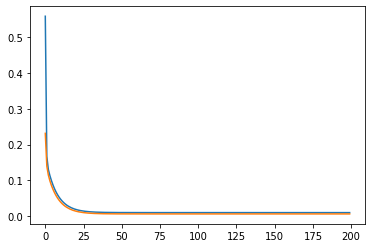

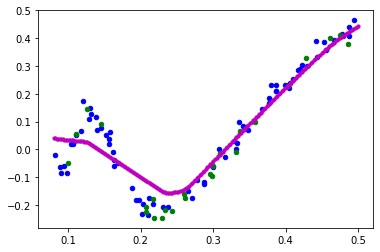

In [71]:
def initializerf(initf,**args):
    def initializer(layer):
        if type(layer) == nn.Linear:
          layer.bias.data.fill_(0.)
          print(layer.weight.data.shape)
          layer.weight.data=torch.tensor(initf(layer.weight.data.shape[0],layer.weight.data.shape[1],**args),dtype=torch.float)
    return initializer
def kaiming_uniform(in_d,out_d):
    #return np.random.uniform(-1.,1.,(in_d,out_d))*np.sqrt(6./(in_d))   # this blows up when in_d = 1
    return np.random.uniform(-1.,1.,(in_d,out_d))*np.sqrt(6./(np.max((in_d,out_d))))

def kaiming_normal(in_d,out_d):
    return np.random.randn(in_d,out_d)*np.sqrt(2/(in_d))
initializer = initializerf(kaiming_uniform)
#initializer = initializerf(kaiming_normal)

#actf = torch.relu
#actf = torch.sigmoid
actf = torch.selu
if actf == torch.relu:
  lr=.15   # this is okay for relu
if actf == torch.selu:
  lr=.015  # this is okay for selu
epochs2=400
model = FCNet(x2_train.shape[1],(1000,1000,1000),y2_train.shape[1],actf)
model.apply(initializer)
model.to(device)
for p in model.named_parameters():
  print(p[0])
  display_tensor(p[1])
opt = torch.optim.SGD(model.parameters(), lr=lr)   # sets the initial LR
train_step = make_train_step(model, mse_loss_fn, opt)
eval_model = make_eval_model(model,val_loader2,mse_loss_fn)
lrsched = MultiStepLR(opt, milestones=[i*40 for i in range(1,epochs//40)], gamma=0.9)
#lrsched = ReduceLROnPlateau(opt, 'min')

if type(lrsched) is ReduceLROnPlateau:
  train_metrics = train_model_plateau(model,train_step,eval_model,epochs2,lrsched,train_loader2)
else:
  train_metrics = train_model_generic(model,train_step,eval_model,epochs2,lrsched,train_loader2)
plt.plot(losses)
plt.plot(val_losses)
plt.show()

npgrid=np.linspace(.08,.5,201)
grid=torch.tensor(npgrid.reshape(-1,1),device=device).float()
mfit = model(grid).detach().cpu()
plt.scatter(x2_train,y2_train,c='b',s=20)
plt.scatter(x2_test,y2_test,c='g',s=20)
plt.scatter(npgrid,mfit,c='m',s=10)

# Collecting Metrics

# Saving/Restoring Models

I created a folder called 'tutorial' on my google drive (drive.google.com)

In [190]:

from google.colab import drive
drive.mount('/content/drive')

import pickle
torch.save(model.state_dict(),'/content/drive/My Drive/tutorial/model.pt')
with open('/content/drive/My Drive/tutorial/tutorial.pickle','wb') as f:
  pickle.dump(x2,f)
  pickle.dump(y2,f)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import pickle
# the parameters aren't important - they will get reset by the 'load_state_dict' method
model = FCNet(x2_train.shape[1],(1000,1000,1000),y2_train.shape[1])
model.load_state_dict(torch.load('/content/drive/My Drive/tutorial/model.pt'))
model.to(device)
with open('/content/drive/My Drive/tutorial/tutorial.pickle','rb') as f:
  x2 = pickle.load(f)
  y2 = pickle.load(f)

# Binary Classification

Start with some 1-d data

(200, 1)
(200,) int64


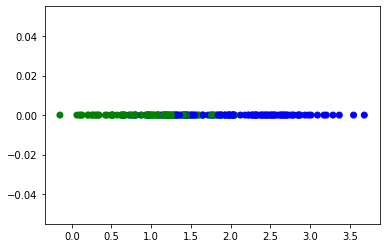

In [72]:
from collections import deque
from collections.abc import Iterable
def atleast_2d(x,axis=1):
    return x if np.ndim(x) > 1 else np.expand_dims(x,axis)

def gmix_ndv2(*args):
    def f(*counts):
        d = deque()
        for class_num,(n,(m,c)) in enumerate(zip(counts,args)):
            #print(class_num,n,m,c)
            nd = len(m) if isinstance(m,Iterable) else 1
            xy = np.random.multivariate_normal(m,c,n) if nd>1 else np.random.normal(m,c,n)
            xyt = np.column_stack((xy,np.repeat(class_num,n)))
            d.append(xyt)
        data=np.vstack(d)
        np.random.shuffle(data)
        return data[:,:nd], (data[:,nd]).astype(int)
    return f

gmixf = gmix_ndv2((1.,.5),(2.,.7))
x3,y3=gmixf(100,100)
print(x3.shape)
print(y3.shape,y3.dtype)
plt.scatter(x3,np.zeros(x3.shape[0]),c=np.array(['g','b'])[y3])

The previous functions didn't collect 'accuracy', so there are slightly updated versions

In [0]:
# add ability to compute accuracy
def make_classifier_train_step(model,loss_fn,optimizer):
    def train_step(inputs,targets):
        model.train()   # set model to 'train' model (Not 'eval')
        yhat = model(inputs)
        loss = loss_fn(yhat,targets)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item(), model.accuracy(yhat,targets).item()
    return train_step

# slightly modified version of earlier code -- adds ability to track accuracy
def make_classifier_eval_model(model,val_loader,loss_fn):
  def closure():
    val_accuracy = []
    val_losses = []
    # assuming that validation data is small enough to treat as a single batch 
    # if that's not the case then will need to average losses as like above
    # there should be a check that val_loader only provides 1 batch
    with torch.no_grad():
        for i,(x_val, y_val) in enumerate(val_loader):
          assert i==0, 'eval_model: more than one batch -- code will fail'
          inputs = x_val.to(device)
          targets = y_val.to(device)
          model.eval()
          yhat = model(inputs)
          val_loss = loss_fn(yhat,targets).item()
          val_acc = model.accuracy(yhat,targets).item()
    return val_loss, val_acc
  return closure

# slightly modified version of earlier code -- adds ability to track accuracy
def train_classifier_model_generic(model,train_step,eval_model,epochs,lrsched,train_loader):
  accuracy = []
  losses = []
  val_loss = []
  val_acc = []
  for epoch in range(1,epochs+1):
    total_acc = 0.
    total_loss = 0.
    for batch, (x_batch, y_batch) in enumerate(train_loader):
        inputs = x_batch.to(device)
        targets = y_batch.to(device)

        loss,acc = train_step(inputs, targets)
        total_loss += loss
        total_acc += acc
    losses.append(total_loss/(batch+1.))
    accuracy.append(total_acc/(batch+1.))
    print(epoch,losses[-1],accuracy[-1],lrsched.get_last_lr())
    lrsched.step()
    
    loss, acc = eval_model()
    val_loss.append(loss)
    val_acc.append(acc)
  return {'train_loss':losses, 'train_acc':accuracy, 'val_loss':val_loss,'val_acc':val_acc}

Now instantiate our model with appropriate activation and output functions for binary classification

140
initializing weights
1 0.9573709198406765 0.4642857185431889 [0.2]
2 0.7126313618251255 0.4000000080892018 [0.2]
3 0.6801435777119228 0.49285715392657686 [0.2]
4 0.660767206123897 0.49285715392657686 [0.2]
5 0.6434194786208016 0.5642857253551483 [0.2]
6 0.6276696409497943 0.614285728761128 [0.2]
7 0.6133973683629718 0.614285728761128 [0.2]
8 0.6004629731178284 0.6571428648063115 [0.2]
9 0.5887282150132316 0.6500000102179391 [0.2]
10 0.5780659743717739 0.657142869063786 [0.2]
11 0.5683619209698269 0.6928571547780719 [0.2]
12 0.5595142756189618 0.6857142959322248 [0.2]
13 0.5514326521328518 0.6928571547780719 [0.2]
14 0.5440370695931571 0.7142857228006635 [0.2]
15 0.5372567261968341 0.7142857228006635 [0.2]
16 0.5310289902346474 0.7214285816465106 [0.2]
17 0.5252984379019056 0.7214285816465106 [0.2]
18 0.520016040120806 0.7357142908232552 [0.2]
19 0.5151383578777313 0.7500000085149493 [0.2]
20 0.5106268099376133 0.7428571581840515 [0.2]
21 0.5064471278871808 0.7571428673607963 [0.2]


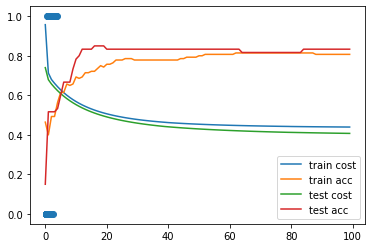

In [75]:
def atleast_2d(x,axis=1):
    return x if np.ndim(x) > 1 else np.expand_dims(x,axis)

# othogonal weights initialization - very recent idea
def init_weights(module):
    if isinstance(module, nn.Linear):
          print("initializing weights")
          nn.init.orthogonal_(module.weight.data)  
          nn.init.zeros_(module.bias.data)

nd=1
gmixf = gmix_ndv2((1.,.5),(2.,.7))
x3,y3=gmixf(100,100)
plt.scatter(x3,y3)
y3 = atleast_2d(y3)

from torch.utils.data.dataset import random_split
x3_tensor = torch.from_numpy(x3).float()
y3_tensor = torch.from_numpy(y3).float()
dataset3 = TensorDataset(x3_tensor, y3_tensor)
ntrain = round(.7*x3.shape[0])
ntest = x3.shape[0]-ntrain
print(ntrain)
train_dataset3, val_dataset3 = random_split(dataset3, [ntrain, ntest])

train_loader3 = DataLoader(dataset=train_dataset3, batch_size=20)
val_loader3 = DataLoader(dataset=val_dataset3, batch_size=ntest)

# Note: the output function is sigmoid, but it is only used by
# the ``fit`` function. ``forward`` (and so net(x)) returns net-values
model=FCNet(1,(),1,torch.sigmoid,torch.sigmoid)
model.apply(init_weights)
model.to(device)

lr=.2
epochs3=100

loss_fn = nn.BCEWithLogitsLoss()
opt = torch.optim.SGD(model.parameters(), lr=lr)   # sets the initial LR
train_step = make_classifier_train_step(model, loss_fn, opt)
eval_model = make_classifier_eval_model(model,val_loader3,loss_fn)
lrsched = MultiStepLR(opt, milestones=[i*40 for i in range(1,epochs//20)], gamma=0.9)
train_metrics = train_classifier_model_generic(model,train_step,eval_model,epochs3,lrsched,train_loader3)

plt.plot(train_metrics['train_loss'],label='train cost')
plt.plot(train_metrics['train_acc'],label='train acc')
plt.plot(train_metrics['val_loss'],label='test cost')
plt.plot(train_metrics['val_acc'],label='test acc')
plt.legend()


Now for a softmax classifier - first with no hidden layers

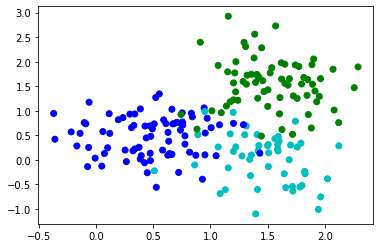

140
2 3
initializing weights
1 0.9445097276142665 0.507142858845847 [0.2]
2 0.8105185287339347 0.6571428605488369 [0.2]
3 0.744723345552172 0.7071428639548165 [0.2]
4 0.6918071763856071 0.7285714404923576 [0.2]
5 0.6477334414209638 0.7785714438983372 [0.2]
6 0.6106008546692985 0.828571447304317 [0.2]
7 0.5790129048483712 0.8500000153269086 [0.2]
8 0.5518970787525177 0.8714285833495004 [0.2]
9 0.5284202482019152 0.8785714336803981 [0.2]
10 0.5079298317432404 0.8785714336803981 [0.2]
11 0.48991118584360394 0.8714285748345512 [0.2]
12 0.4739554694720677 0.8785714336803981 [0.2]
13 0.4597354531288147 0.8785714336803981 [0.2]
14 0.4469871350697109 0.8785714336803981 [0.2]
15 0.4354959854057857 0.8785714336803981 [0.2]
16 0.4250862087522234 0.8785714336803981 [0.2]
17 0.41561264225414823 0.8857142925262451 [0.2]
18 0.40695469294275555 0.8857142925262451 [0.2]
19 0.3990111563886915 0.8928571513720921 [0.2]
20 0.3916969427040645 0.8928571513720921 [0.2]
21 0.38493973868233816 0.892857151372092

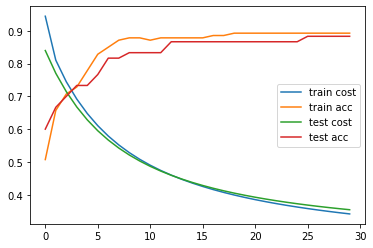

In [76]:
set1 = (np.array([.5,.5]),np.diag([.2,.2]))
set2 = (np.array([1.5,1.5]),np.diag([.1,.2]))
set3 = (np.array([1.5,0]),np.diag([.1,.2]))
gmixf = gmix_ndv2(set1,set2,set3)

x4,y4=gmixf(80,70,50)
plt.scatter(x4[:,0],x4[:,1],c=np.array(['b','g','c'])[y4])
plt.show()
#y4 = atleast_2d(y4)

x4_tensor = torch.from_numpy(x4).float()
y4_tensor = torch.from_numpy(y4).long()
dataset4 = TensorDataset(x4_tensor, y4_tensor)
ntrain = round(.7*x4.shape[0])
ntest = x4.shape[0]-ntrain
print(ntrain)
train_dataset4, val_dataset4 = random_split(dataset4, [ntrain, ntest])

train_loader4 = DataLoader(dataset=train_dataset4, batch_size=20)
val_loader4 = DataLoader(dataset=val_dataset4, batch_size=ntest)

# Note: the output function is sigmoid, but it is only used by
# the ``fit`` function. ``forward`` (and so net(x)) returns net-values
inp_d = x4.shape[1]
out_d = len(np.unique(y4))
print(inp_d,out_d)
model=FCNet(inp_d,(),out_d,torch.relu,lambda z: torch.softmax(z,dim=1))
model.apply(init_weights)
model.to(device)

lr=.2
epochs4=30

loss_fn = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr=lr)   # sets the initial LR
train_step = make_classifier_train_step(model, loss_fn, opt)
eval_model = make_classifier_eval_model(model,val_loader4,loss_fn)
lrsched = MultiStepLR(opt, milestones=[i*20 for i in range(1,epochs4//20)], gamma=0.9)
train_metrics = train_classifier_model_generic(model,train_step,eval_model,epochs4,lrsched,train_loader4)

plt.plot(train_metrics['train_loss'],label='train cost')
plt.plot(train_metrics['train_acc'],label='train acc')
plt.plot(train_metrics['val_loss'],label='test cost')
plt.plot(train_metrics['val_acc'],label='test acc')
plt.legend()



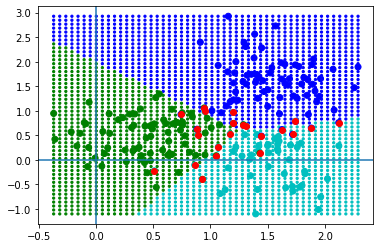

In [77]:

# xpts = np.linspace(xmin-margin,xmax+margin,NX)
def xy_grid_pts(xpts,ypts):
    nx = len(xpts); ny = len(ypts)
    return np.column_stack((np.repeat(xpts,ny),np.tile(ypts,nx)))

grid = xy_grid_pts(np.linspace(np.min(x4[:,0]),np.max(x4[:,0]),51),np.linspace(np.min(x4[:,1]),np.max(x4[:,1]),51))
gridz = model(torch.from_numpy(grid).float().to(device))
grid_pred = model.predict(gridz)
grid_pred = to_numpy(grid_pred).astype(int)

colors =  np.array(['g','b','c'])
plt.scatter(grid[:,0],grid[:,1],s=5,c=colors[grid_pred])
plt.scatter(x4[:,0],x4[:,1],c=colors[y4])
plt.axhline(y=0)
plt.axvline(0)
pred=to_numpy(model.predict(model(x4_tensor.to(device))))
bads=np.where(pred != y4)
plt.scatter(x4[bads,0],x4[bads,1],c='r')
plt.show()


Redo the same example but with hidden layers and lots of hidden nodes

initializing weights
initializing weights
initializing weights
initializing weights
1 1.048322013446263 0.4857142950807299 [0.2]
2 0.9260457413537162 0.6071428656578064 [0.2]
3 0.7922235812459674 0.692857163293021 [0.2]
4 0.6592441030911037 0.8214285714285714 [0.2]
5 0.5369905573981149 0.8785714421953473 [0.2]
6 0.4341125956603459 0.8857143010411944 [0.2]
7 0.36395867807524546 0.8928571598870414 [0.2]
8 0.3263719912086214 0.8857143010411944 [0.2]
9 0.3075674793549946 0.8714285833495004 [0.2]
10 0.2979192244155066 0.8714285833495004 [0.2]
11 0.29337637020008905 0.8785714421953473 [0.2]
12 0.292000521506582 0.8857143010411944 [0.2]
13 0.2913891077041626 0.8785714421953473 [0.2]
14 0.2896780680332865 0.8714285833495004 [0.2]
15 0.2886716313660145 0.8714285833495004 [0.2]
16 0.2877771902297224 0.8857143010411944 [0.2]
17 0.2865156722920282 0.8785714421953473 [0.2]
18 0.2861155718564987 0.8785714421953473 [0.2]
19 0.28499640950134825 0.8785714421953473 [0.2]
20 0.28401631861925125 0.8785714

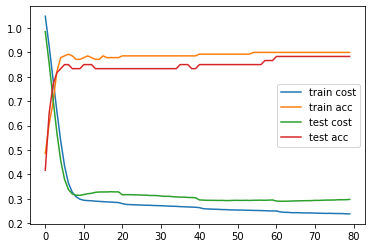

In [78]:
model=FCNet(inp_d,(800,800,800),out_d,torch.relu,lambda z: torch.softmax(z,dim=1))
model.apply(init_weights)
model.to(device)

lr=.2
epochs4=80

loss_fn = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr=lr)   # sets the initial LR
train_step = make_classifier_train_step(model, loss_fn, opt)
eval_model = make_classifier_eval_model(model,val_loader4,loss_fn)
lrsched = MultiStepLR(opt, milestones=[i*20 for i in range(1,epochs4//20)], gamma=0.9)
train_metrics = train_classifier_model_generic(model,train_step,eval_model,epochs4,lrsched,train_loader4)

plt.plot(train_metrics['train_loss'],label='train cost')
plt.plot(train_metrics['train_acc'],label='train acc')
plt.plot(train_metrics['val_loss'],label='test cost')
plt.plot(train_metrics['val_acc'],label='test acc')
plt.legend()

Last step for now -- look at the non-linear decision boundaries

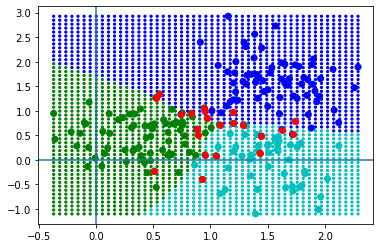

In [79]:
grid = xy_grid_pts(np.linspace(np.min(x4[:,0]),np.max(x4[:,0]),51),np.linspace(np.min(x4[:,1]),np.max(x4[:,1]),51))
gridz = model(torch.from_numpy(grid).float().to(device))
grid_pred = model.predict(gridz)
grid_pred = to_numpy(grid_pred).astype(int)

colors =  np.array(['g','b','c'])
plt.scatter(grid[:,0],grid[:,1],s=5,c=colors[grid_pred])
plt.scatter(x4[:,0],x4[:,1],c=colors[y4])
plt.axhline(y=0)
plt.axvline(0)
pred=to_numpy(model.predict(model(x4_tensor.to(device))))
bads=np.where(pred != y4)
plt.scatter(x4[bads,0],x4[bads,1],c='r')
plt.show()